In [1]:
#
#T. Bradford
#June 2021

# Dependencies
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
from scipy.stats import sem
import requests
import json
#import tweepy
import pandas as pd
#from config import key, secret_key, token, token_secret
from pandas_datareader import data
import mplfinance as mpf

#config keys for twitter
#auth = tweepy.OAuthHandler(key,secret_key)
#auth.set_access_token(token,token_secret)
#api = tweepy.API(auth)

In [2]:
#Query twitter api
#may not be able tp use
#tweet = tweepy.Cursor(api.search, q="#Bitcoin",lang = "en",tweet_mode="extended", since = "2021-06-11", until = "2021-06-12").items(10)

In [3]:
#for i in tweet:
    #print(i)
    #print(dir(i))
    #print(i.full_text)

In [4]:
#define a function that take user's input to request and retreive stock ticker information
def stock_information():
    #User input ticker symbol not case sensitive and date range
    ticker_symbol = input("'Please enter a ticker symbol'").upper()
    start_date = input("'Please enter start date of your search yyyy-mm-dd'")
    end_date = input("'Please enter end date of your search yyyy-mm-dd'")
    #
    try:
        user_request = data.DataReader(ticker_symbol, "yahoo", start_date,end_date)
    except ValueError:
        print("Date range or format not correct.")
    except KeyError:
        print("Invalid ticker symbol.")

    #Create ticker dataframe with try except for data handling.
    try:
        #rename colums to include requested ticker symbol
        ticker_dataframe = pd.DataFrame(user_request[["High","Low","Volume"]]).rename(columns={"High": f"{ticker_symbol} High","Low": f"{ticker_symbol} Low","Volume": f"{ticker_symbol} Volume"})
    except UnboundLocalError:
        print("Unable return your request.")
    #export a csv of dataframe    
    ticker_dataframe.to_csv(f"output/{ticker_symbol}_{start_date}_{end_date}.csv")
    #
    #try:
    return ticker_dataframe
    #except UnboundLocalError:
        #print("Please try again!")
 

In [5]:
#Bitcoin ticker symbol is BTC-USD
#Etheremum ticker symbol is ETH-USD
#Dogecoin ticker symbol is DOGE-USD
#Tether ticker symbol is USDT-USD
#Cardano ticker symbol is ADA-USD
#creat a list of cryptocurrencies
crypto_list=["BTC-USD","ETH-USD","DOGE-USD","USDT-USD","ADA-USD"]
#define date range
start_d = "2018-06-01"
end_d = "2020-06-30"
#creat dataframe two indexes
crypto_list_df = data.DataReader(crypto_list, "yahoo", start_d,end_d)
#filter out daily high
crypto_high = crypto_list_df.High.rename(columns={"BTC-USD": "Bitcoin High", "ETH-USD": "Etheremum High","DOGE-USD":"Dogecoin High", "USDT-USD":"Tether High", "ADA-USD":"Cardano High" })
#save to csv
crypto_high.to_csv("output/crypto_high.csv")
#display
crypto_high.head()

Symbols,Bitcoin High,Etheremum High,Dogecoin High,Tether High,Cardano High
Date,,,,,
2018-05-31,7604.729980,589.093018,0.003469,1.00865,0.229184
2018-06-01,7695.830078,597.077026,0.003584,1.00564,0.229531
2018-06-02,7754.890137,624.513000,0.003750,1.00376,0.236761
2018-06-03,7753.819824,623.429016,0.003760,1.00680,0.231228
2018-06-04,7643.229980,611.330017,0.003722,1.01146,0.221728


In [6]:
#calculate mean, median, variance, standard deviation, and Cryptocurrency high
crypto_high_mean = crypto_high.mean()
crypto_high_median = crypto_high.median()
crypto_high_variance = crypto_high.var()
crypto_high_std = crypto_high.std()
crypto_high_sem = crypto_high.sem()

#create Dataframe
crypto_high_stats = pd.DataFrame({"Mean": crypto_high_mean,"Median": crypto_high_median, "Variance":crypto_high_variance, "standard deviation": crypto_high_std, "Standard Error of the Mean":crypto_high_sem})

#save to csv
crypto_high_stats.to_csv("output/crypto_high_stats.csv")

#display
crypto_high_stats

,Mean,Median,Variance,standard deviation,Standard Error of the Mean
Symbols,,,,,
Bitcoin High,7444.047734,7427.385742,5.139878e+06,2267.129828,82.183392
Etheremum High,220.907715,195.147934,1.042454e+04,102.100624,3.701145
Dogecoin High,0.002852,0.002583,8.920380e-07,0.000944,0.000034
Tether High,1.011716,1.010486,9.115036e-05,0.009547,0.000346
Cardano High,0.068951,0.055928,1.412334e-03,0.037581,0.001362


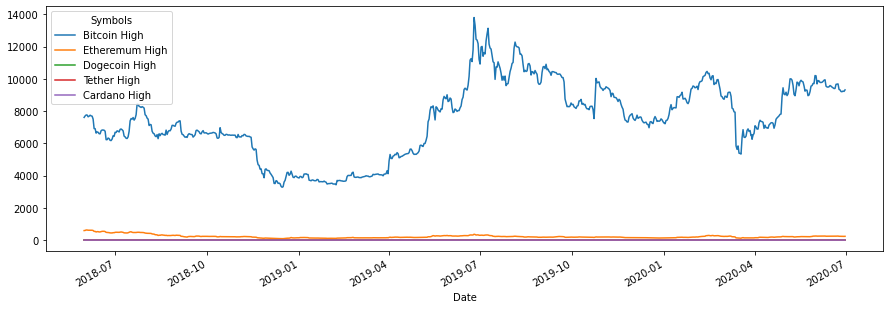

In [7]:
crypto_high[["Bitcoin High","Etheremum High","Dogecoin High","Tether High","Cardano High"]].plot(figsize=(15,5));

In [8]:
#filter out daily low
crypto_low = crypto_list_df.Low.rename(columns={"BTC-USD": "Bitcoin Low", "ETH-USD": "Etheremum Low","DOGE-USD":"Dogecoin Low", "USDT-USD":"Tether Low", "ADA-USD":"Cardano Low" })
#save to csv
crypto_low.to_csv("output/crypto_low.csv")
#display
crypto_low.head()

Symbols,Bitcoin Low,Etheremum Low,Dogecoin Low,Tether Low,Cardano Low
Date,,,,,
2018-05-31,7407.339844,567.664978,0.003336,0.994694,0.216955
2018-06-01,7497.259766,577.322021,0.003400,0.986231,0.219242
2018-06-02,7613.040039,591.258972,0.003545,0.986847,0.225118
2018-06-03,7474.040039,583.747009,0.003512,0.995257,0.212290
2018-06-04,7397.000000,580.981995,0.003514,0.990879,0.204815


In [9]:
#calculate mean, median, variance, standard deviation, and Cryptocurrency low
crypto_low_mean = crypto_low.mean()
crypto_low_median = crypto_low.median()
crypto_low_variance = crypto_low.var()
crypto_low_std = crypto_low.std()
crypto_low_sem = crypto_low.sem()

#create Dataframe
crypto_low_stats = pd.DataFrame({"Mean": crypto_low_mean,"Median": crypto_low_median, "Variance":crypto_low_variance, "standard deviation": crypto_low_std, "Standard Error of the Mean":crypto_low_sem})

#save to csv
crypto_low_stats.to_csv("output/crypto_low_stats.csv")

#display
crypto_low_stats

,Mean,Median,Variance,standard deviation,Standard Error of the Mean
Symbols,,,,,
Bitcoin Low,7137.763140,7170.922852,4.614208e+06,2148.070823,77.867507
Etheremum Low,209.078151,185.086319,9.396720e+03,96.936680,3.513952
Dogecoin Low,0.002690,0.002471,7.474941e-07,0.000865,0.000031
Tether Low,0.994434,0.995340,9.928309e-05,0.009964,0.000361
Cardano Low,0.064235,0.051520,1.208255e-03,0.034760,0.001260


In [10]:
#filter out daily volume
crypto_volume = crypto_list_df.Volume.rename(columns={"BTC-USD": "Bitcoin Volume", "ETH-USD": "Etheremum Volume","DOGE-USD":"Dogecoin Volume", "USDT-USD":"Tether Volume", "ADA-USD":"Cardano Volume" })
#save to csv
crypto_volume.to_csv("output/crypto_volume.csv")
#display
crypto_volume.head()

Symbols,Bitcoin Volume,Etheremum Volume,Dogecoin Volume,Tether Volume,Cardano Volume
Date,,,,,
2018-05-31,4.921460e+09,1.945890e+09,5436780.0,2.486080e+09,130538000.0
2018-06-01,4.939300e+09,1.880390e+09,5918490.0,3.187570e+09,116435000.0
2018-06-02,4.851760e+09,1.832550e+09,19570200.0,2.796300e+09,117208000.0
2018-06-03,4.993170e+09,1.903430e+09,22162200.0,2.798280e+09,115605000.0
2018-06-04,4.961740e+09,1.844270e+09,18819700.0,2.796070e+09,119846000.0


In [11]:
#calculate mean, median, variance, standard deviation, and Cryptocurrency volume
crypto_volume_mean = crypto_volume.mean()
crypto_volume_median = crypto_volume.median()
crypto_volume_variance = crypto_volume.var()
crypto_volume_std = crypto_volume.std()
crypto_volume_sem = crypto_volume.sem()

#create Dataframe
crypto_volume_stats = pd.DataFrame({"Mean": crypto_volume_mean,"Median": crypto_volume_median, "Variance":crypto_volume_variance, "standard deviation": crypto_volume_std, "Standard Error of the Mean":crypto_volume_sem})

#save to csv
crypto_volume_stats.to_csv("output/crypto_volume_stats.csv")

#display
crypto_volume_stats

,Mean,Median,Variance,standard deviation,Standard Error of the Mean
Symbols,,,,,
Bitcoin Volume,1.769974e+10,1.562702e+10,1.767691e+20,1.329545e+10,4.819599e+08
Etheremum Volume,7.379228e+09,6.658100e+09,3.257107e+19,5.707107e+09,2.068825e+08
Dogecoin Volume,6.542154e+07,3.814386e+07,4.514513e+15,6.719013e+07,2.435640e+06
Tether Volume,1.973029e+10,1.691267e+10,3.073182e+20,1.753049e+10,6.354799e+08
Cardano Volume,9.003584e+07,6.654359e+07,6.816247e+15,8.256056e+07,2.992818e+06


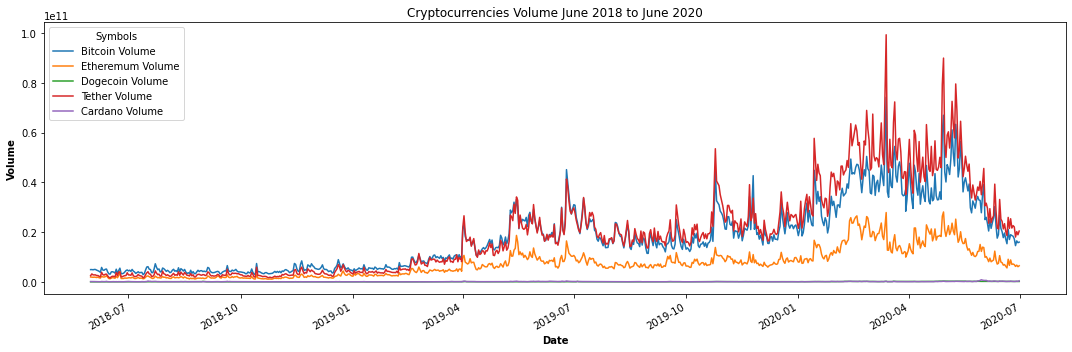

In [12]:
two_yr_crypy_volume = crypto_volume[["Bitcoin Volume","Etheremum Volume","Dogecoin Volume","Tether Volume","Cardano Volume"]].plot(figsize=(15,5),title = "Cryptocurrencies Volume June 2018 to June 2020")

two_yr_crypy_volume.set_xlabel("Date",fontweight="bold")
two_yr_crypy_volume.set_ylabel("Volume",fontweight="bold")

#save plot
plt.savefig("output/june2018_thru_june202_crypto_volume.jpg")

#display
two_yr_crypy_volume
plt.tight_layout()

In [13]:
#define colors for candles
change_color = mpf.make_marketcolors(up ="green", down="red")
market_style = mpf.make_mpf_style(marketcolors = change_color)

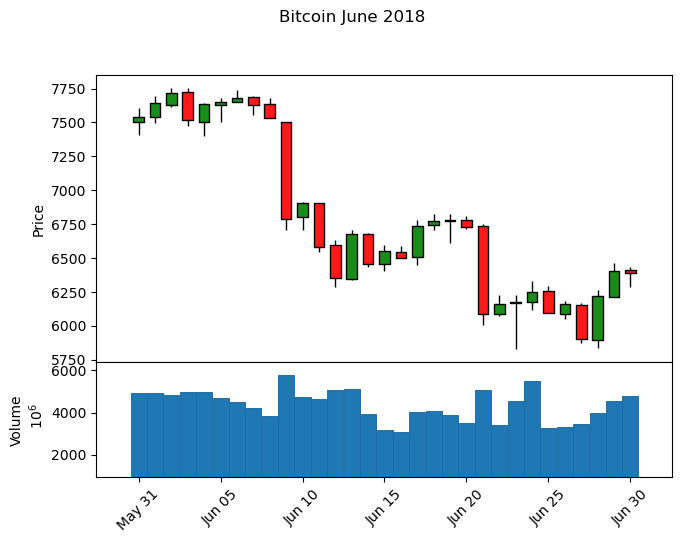

<Figure size 640x480 with 0 Axes>

In [14]:
#bitcoin price and volume june 2018
bitcoin_june18 =data.DataReader("BTC-USD", "yahoo", "2018-06-01","2018-06-30")

#plot
bitcoin_june18_plot = mpf.plot(bitcoin_june18, type='candle', title='Bitcoin June 2018',ylabel='Price', ylabel_lower='Volume',volume=True, style = market_style)

#save plot
plt.savefig("output/bitcoin_june2018.jpg")

#Display
bitcoin_june18_plot

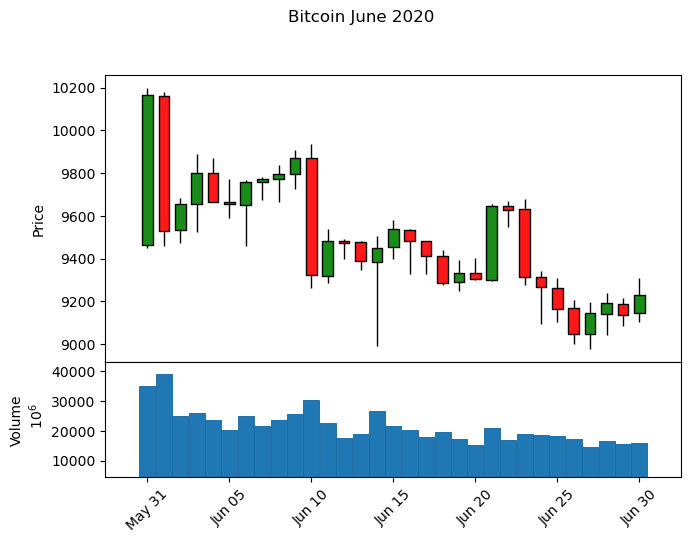

<Figure size 640x480 with 0 Axes>

In [15]:
#bitcoin price and volume june 2020
bitcoin_june20 =data.DataReader("BTC-USD", "yahoo", "2020-06-01","2020-06-30")

#plot
bitcoin_june20_plot = mpf.plot(bitcoin_june20, type='candle', title='Bitcoin June 2020',ylabel='Price', ylabel_lower='Volume',volume=True, style = market_style)

#save plot
plt.savefig("output/bitcoin_june2020.jpg")

#Display
bitcoin_june20_plot

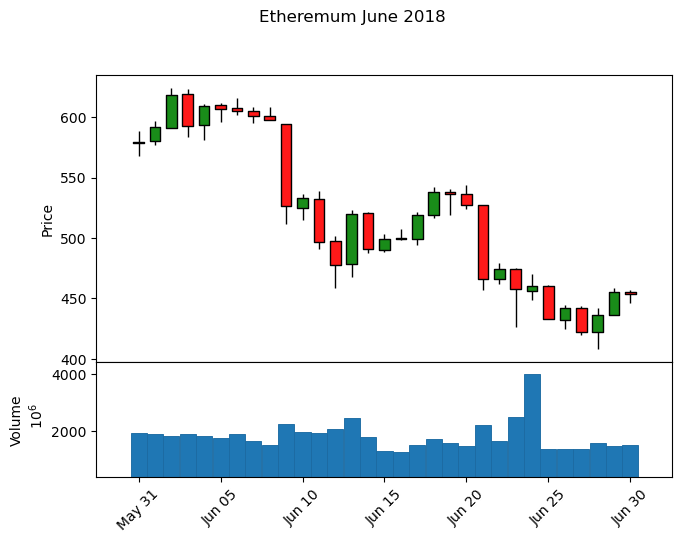

<Figure size 640x480 with 0 Axes>

In [16]:
#etheremum price and volume june 2018
etheremum_june18 =data.DataReader("ETH-USD", "yahoo", "2018-06-01","2018-06-30")

#plot
etheremum_june18_plot = mpf.plot(etheremum_june18, type='candle', title='Etheremum June 2018',ylabel='Price', ylabel_lower='Volume',volume=True, style = market_style)

#save plot
plt.savefig("output/etheremum_june2018.jpg")

#Display
etheremum_june18_plot

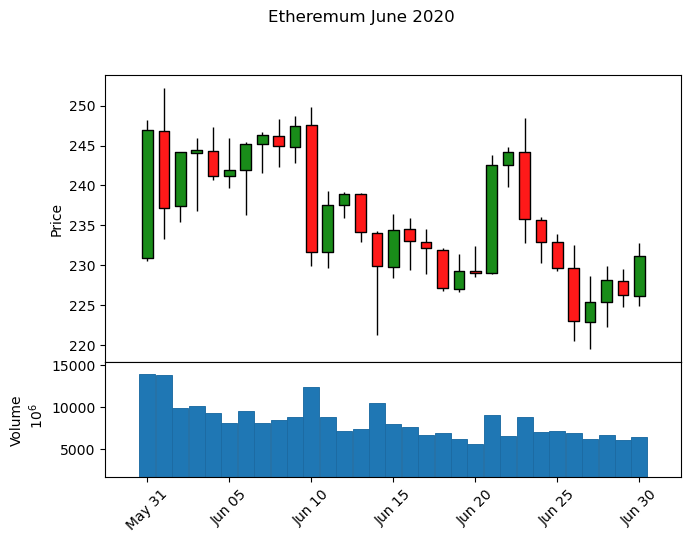

<Figure size 640x480 with 0 Axes>

In [17]:
#etheremum price and volume june 2020
etheremum_june20 =data.DataReader("ETH-USD", "yahoo", "2020-06-01","2020-06-30")

#plot
etheremum_june20_plot = mpf.plot(etheremum_june20, type='candle', title='Etheremum June 2020',ylabel='Price', ylabel_lower='Volume',volume=True, style = market_style)

#save plot
plt.savefig("output/etheremum_june2020.jpg")

#Display
etheremum_june20_plot

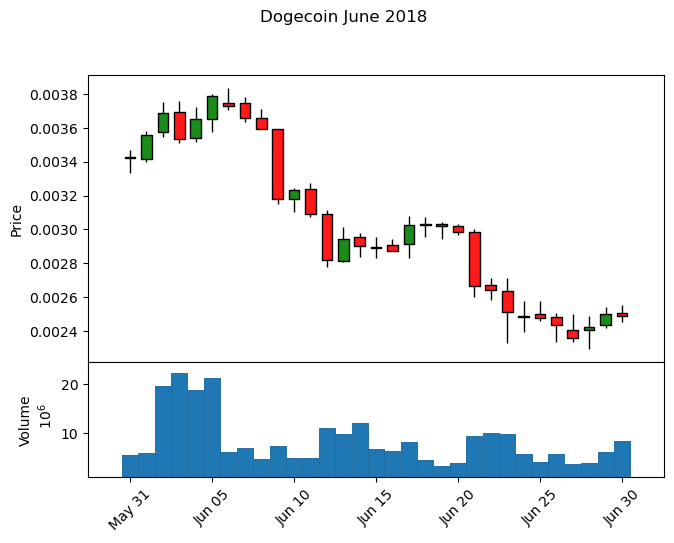

<Figure size 640x480 with 0 Axes>

In [18]:
#dogecoin price and volume june 2018
dogecoin_june18 =data.DataReader("DOGE-USD", "yahoo", "2018-06-01","2018-06-30")

#plot
dogecoin_june18_plot = mpf.plot(dogecoin_june18, type='candle', title='Dogecoin June 2018',ylabel='Price', ylabel_lower='Volume',volume=True, style = market_style)

#save plot
plt.savefig("output/dogecoin_june2018.jpg")

#Display
dogecoin_june18_plot

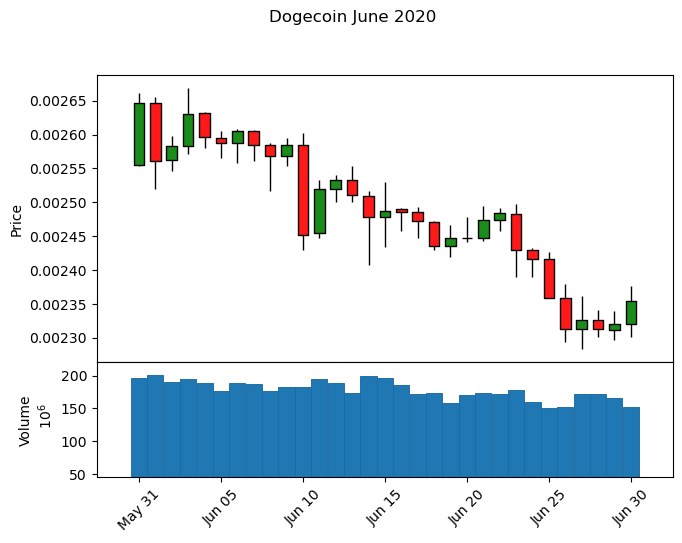

<Figure size 640x480 with 0 Axes>

In [19]:
#dogecoin price and volume june 2020
dogecoin_june20 =data.DataReader("DOGE-USD", "yahoo", "2020-06-01","2020-06-30")

#plot
dogecoin_june20_plot = mpf.plot(dogecoin_june20, type='candle', title='Dogecoin June 2020',ylabel='Price', ylabel_lower='Volume',volume=True, style = market_style)

#save plot
plt.savefig("output/dogecoin_june2020.jpg")

#Display
dogecoin_june20_plot

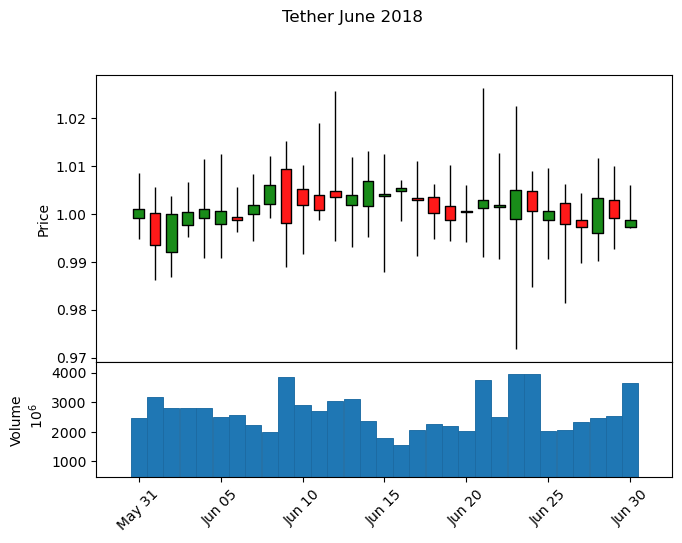

<Figure size 640x480 with 0 Axes>

In [20]:
#tether price and volume june 2018
tether_june18 =data.DataReader("USDT-USD", "yahoo", "2018-06-01","2018-06-30")

#plot
tether_june18_plot = mpf.plot(tether_june18, type='candle', title='Tether June 2018',ylabel='Price', ylabel_lower='Volume',volume=True, style = market_style)

#save plot
plt.savefig("output/tether_june2018.jpg")

#Display
tether_june18_plot

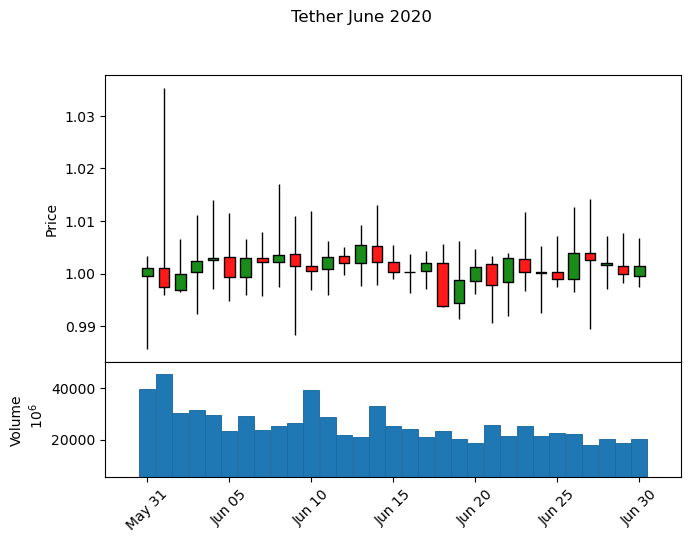

<Figure size 640x480 with 0 Axes>

In [21]:
#tether price and volume june 2020
tether_june20 =data.DataReader("USDT-USD", "yahoo", "2020-06-01","2020-06-30")

#plot
tether_june20_plot = mpf.plot(tether_june20, type='candle', title='Tether June 2020',ylabel='Price', ylabel_lower='Volume',volume=True, style = market_style)

#save plot
plt.savefig("output/tether_june2020.jpg")

#Display
tether_june20_plot

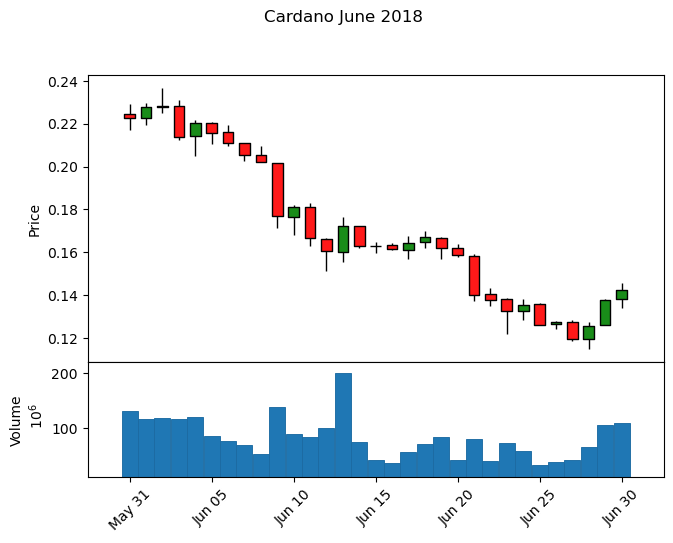

<Figure size 640x480 with 0 Axes>

In [22]:
#Cardano price and volume june 2018
cardano_june18 =data.DataReader("ADA-USD", "yahoo", "2018-06-01","2018-06-30")

#plot
cardano_june18_plot = mpf.plot(cardano_june18, type='candle', title='Cardano June 2018',ylabel='Price', ylabel_lower='Volume',volume=True, style = market_style)

#save plot
plt.savefig("output/cardano_june2018.jpg")

#Display
cardano_june18_plot

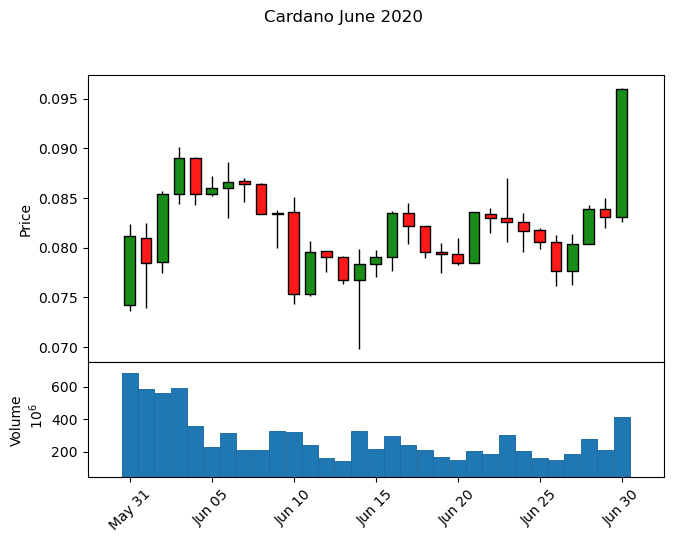

<Figure size 640x480 with 0 Axes>

In [23]:
#Cardano price and volume june 2020
cardano_june20 =data.DataReader("ADA-USD", "yahoo", "2020-06-01","2020-06-30")

#plot
cardano_june20_plot = mpf.plot(cardano_june20, type='candle', title='Cardano June 2020',ylabel='Price', ylabel_lower='Volume',volume=True, style = market_style)

#save plot
plt.savefig("output/cardano_june2020.jpg")

#Display
cardano_june20_plot

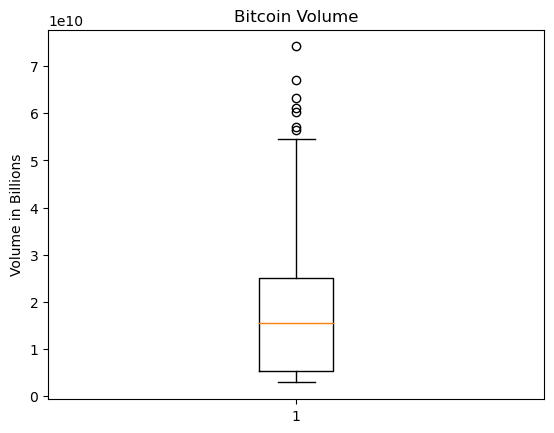

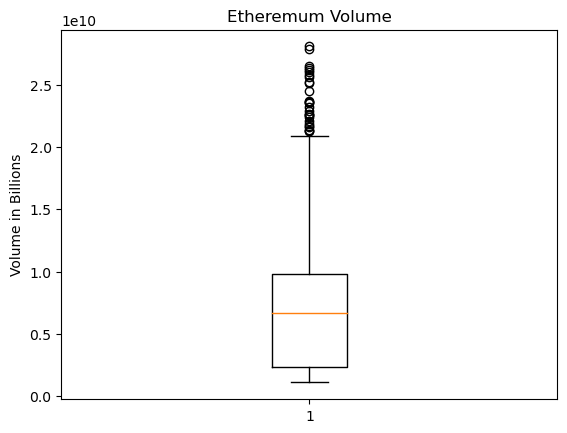

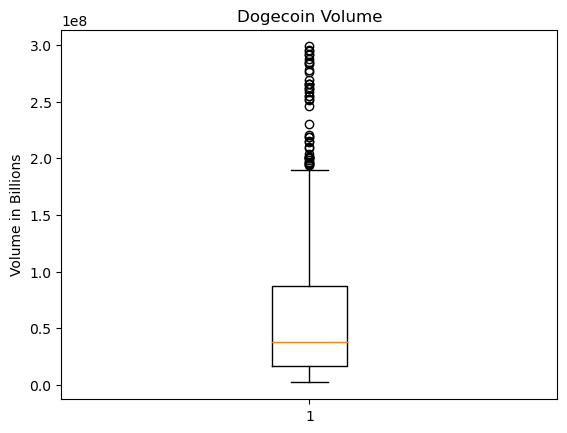

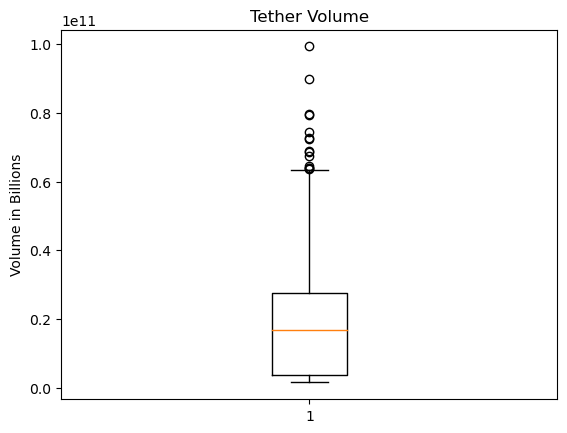

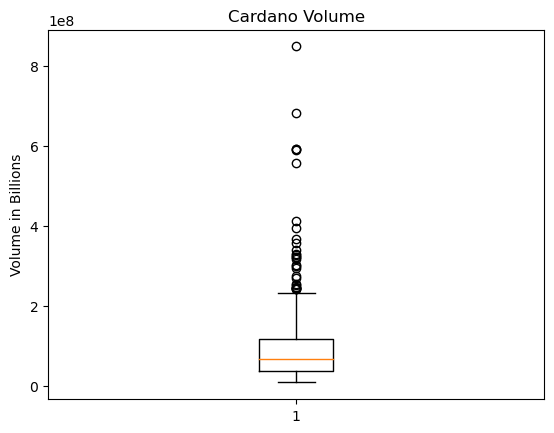

<Figure size 640x480 with 0 Axes>

In [24]:
bitcoin_box = crypto_volume['Bitcoin Volume']

fig1, ax1 = plt.subplots()
ax1.set_title('Bitcoin Volume')
ax1.set_ylabel('Volume in Billions')
ax1.boxplot(bitcoin_box)

etheremum_box = crypto_volume['Etheremum Volume']

fig2, ax1 = plt.subplots()
ax1.set_title('Etheremum Volume')
ax1.set_ylabel('Volume in Billions')
ax1.boxplot(etheremum_box)

dogecoin_box = crypto_volume['Dogecoin Volume']

fig3, ax1 = plt.subplots()
ax1.set_title('Dogecoin Volume')
ax1.set_ylabel('Volume in Billions')
ax1.boxplot(dogecoin_box)

tether_box = crypto_volume['Tether Volume']

fig4, ax1 = plt.subplots()
ax1.set_title('Tether Volume')
ax1.set_ylabel('Volume in Billions')
ax1.boxplot(tether_box)

cardano_box = crypto_volume['Cardano Volume']

fig4, ax1 = plt.subplots()
ax1.set_title('Cardano Volume')
ax1.set_ylabel('Volume in Billions')
ax1.boxplot(cardano_box)

#display plot
plt.show()
plt.tight_layout()

In [25]:
#DOW JONES ticker symbol is ^DJI
#NASDAQ ticker symbol is ^IXIC
#creat a list of Dow Jones and NASDAQ
stock_indexes_list =["^DJI","^IXIC"]
#define date range
s_date = "2018-06-01"
e_date = "2020-06-30"
#creat dataframe two indexes
stock_indexes_list_df = data.DataReader(stock_indexes_list, "yahoo", start_d,end_d)
#filter out daily high
stock_indexes_list_high = stock_indexes_list_df.High.round(2).rename(columns={"^DJI": "Dow Jones High", "^IXIC":"NASDAQ High"})
#save to csv
stock_indexes_list_high.to_csv("output/stock_indexes_high.csv")
#Display
stock_indexes_list_high.head()

Symbols,Dow Jones High,NASDAQ High
Date,,
2018-06-01,24673.60,7557.38
2018-06-04,24859.37,7607.17
2018-06-05,24838.78,7644.48
2018-06-06,25146.46,7691.65
2018-06-07,25326.09,7697.41


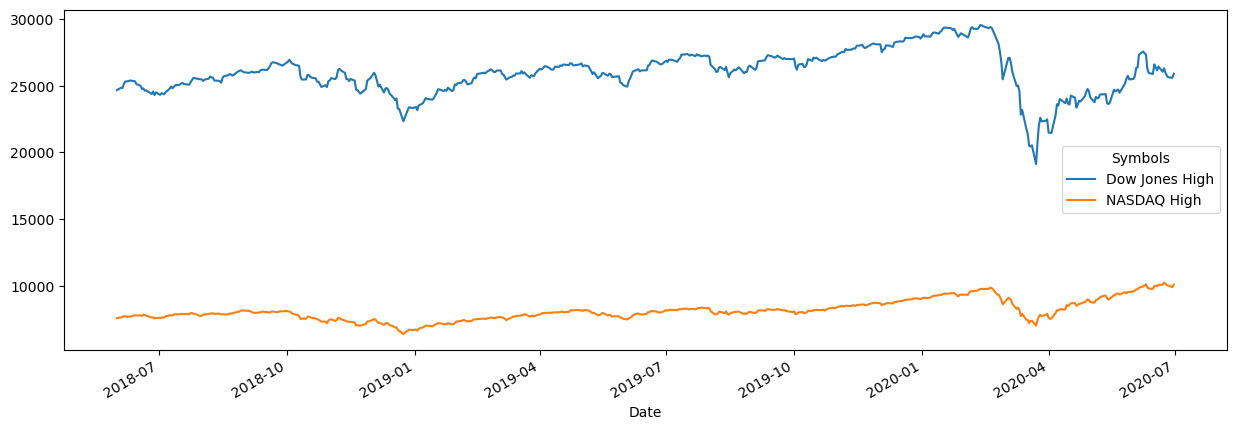

In [26]:
stock_indexes_list_high[["Dow Jones High","NASDAQ High"]].plot(figsize=(15,5));

In [27]:
#calculate mean, median, variance, standard deviation, and Dow Jones and NASDAQ high
stock_indexes_list_high_mean = stock_indexes_list_high.mean()
stock_indexes_list_high_median = stock_indexes_list_high.median()
stock_indexes_list_high_variance = stock_indexes_list_high.var()
stock_indexes_list_high_std = stock_indexes_list_high.std()
stock_indexes_list_high_sem = stock_indexes_list_high.sem()

#create Dataframe
stock_indexes_list_high_stats = pd.DataFrame({"Mean": stock_indexes_list_high_mean,"Median": stock_indexes_list_high_median, "Variance":stock_indexes_list_high_variance, "standard deviation": stock_indexes_list_high_std, "Standard Error of the Mean":stock_indexes_list_high_sem})

#save to csv
stock_indexes_list_high_stats.to_csv("output/stock_indexes_high_stats.csv")

#display
stock_indexes_list_high_stats

,Mean,Median,Variance,standard deviation,Standard Error of the Mean
Symbols,,,,,
Dow Jones High,26007.732328,26029.02,2.614745e+06,1617.017169,70.639723
NASDAQ High,8123.767595,7992.81,5.646125e+05,751.406989,32.825367


In [28]:
#filter out daily low
stock_indexes_list_low = stock_indexes_list_df.Low.round(2).rename(columns={"^DJI": "Dow Jones Low", "^IXIC":"NASDAQ Low"})
#save to csv
stock_indexes_list_low.to_csv("output/stock_indexes_low.csv")
#Display
stock_indexes_list_low.head()

Symbols,Dow Jones Low,NASDAQ Low
Date,,
2018-06-01,24542.09,7487.23
2018-06-04,24722.14,7561.20
2018-06-05,24710.82,7602.38
2018-06-06,24854.14,7622.31
2018-06-07,25164.48,7597.66


In [29]:
#calculate mean, median, variance, standard deviation, and Dow Jones and NASDAQ low
stock_indexes_list_low_mean = stock_indexes_list_low.mean()
stock_indexes_list_low_median = stock_indexes_list_low.median()
stock_indexes_list_low_variance = stock_indexes_list_low.var()
stock_indexes_list_low_std = stock_indexes_list_low.std()
stock_indexes_list_low_sem = stock_indexes_list_low.sem()

#create Dataframe
stock_indexes_list_low_stats = pd.DataFrame({"Mean": stock_indexes_list_low_mean,"Median": stock_indexes_list_low_median, "Variance":stock_indexes_list_low_variance, "standard deviation": stock_indexes_list_low_std, "Standard Error of the Mean":stock_indexes_list_low_sem})

#save to csv
stock_indexes_list_low_stats.to_csv("output/stock_indexes_low_stats.csv")
#Display

#display
stock_indexes_list_low_stats

,Mean,Median,Variance,standard deviation,Standard Error of the Mean
Symbols,,,,,
Dow Jones Low,25680.247405,25734.545,3.122675e+06,1767.109133,77.196521
NASDAQ Low,8007.239008,7899.600,5.708795e+05,755.565695,33.007041


In [30]:
#filter out daily volume
stock_indexes_list_volume = stock_indexes_list_df.Volume.rename(columns={"^DJI": "Dow Jones Volume", "^IXIC":"NASDAQ Volume"})
#save to csv
stock_indexes_list_volume.to_csv("output/stock_indexes_volume.csv")
#Display
stock_indexes_list_volume.head()

Symbols,Dow Jones Volume,NASDAQ Volume
Date,,
2018-06-01,315710000,2208600000
2018-06-04,340400000,2142790000
2018-06-05,306340000,2058630000
2018-06-06,316090000,2191750000
2018-06-07,357680000,2328280000


In [31]:
#calculate mean, median, variance, standard deviation, and Dow Jones and NASDAQ volume
stock_indexes_list_volume_mean = stock_indexes_list_volume.mean()
stock_indexes_list_volume_median = stock_indexes_list_volume.median()
stock_indexes_list_volume_variance = stock_indexes_list_volume.var()
stock_indexes_list_volume_std = stock_indexes_list_volume.std()
stock_indexes_list_volume_sem = stock_indexes_list_volume.sem()

#create Dataframe
stock_indexes_list_volume_stats = pd.DataFrame({"Mean": stock_indexes_list_volume_mean,"Median": stock_indexes_list_volume_median, "Variance":stock_indexes_list_volume_variance, "standard deviation": stock_indexes_list_volume_std, "Standard Error of the Mean":stock_indexes_list_volume_sem})

#save to csv
stock_indexes_list_volume_stats.to_csv("output/stock_indexes_volume_stats.csv")

#display
stock_indexes_list_volume_stats

,Mean,Median,Variance,standard deviation,Standard Error of the Mean
Symbols,,,,,
Dow Jones Volume,3.295807e+08,2.915700e+08,1.661604e+16,1.289032e+08,5.631163e+06
NASDAQ Volume,2.564819e+09,2.256890e+09,8.682351e+17,9.317914e+08,4.070549e+07


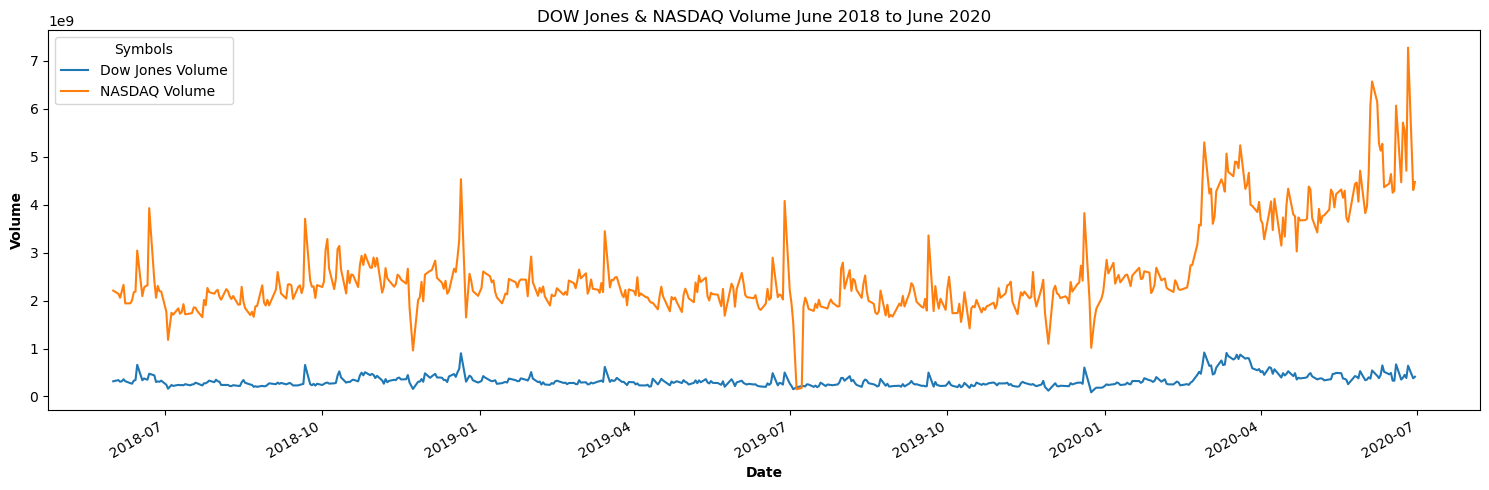

In [32]:
two_yr_stock_indexes_volume = stock_indexes_list_volume[["Dow Jones Volume","NASDAQ Volume"]].plot(figsize=(15,5),title = "DOW Jones & NASDAQ Volume June 2018 to June 2020",)

two_yr_stock_indexes_volume.set_xlabel("Date",fontweight="bold")
two_yr_stock_indexes_volume.set_ylabel("Volume",fontweight="bold")

#save plot
plt.savefig("output/june2018_thru_june202_socke_indexes_volume.jpg")

#display
two_yr_stock_indexes_volume
plt.tight_layout()

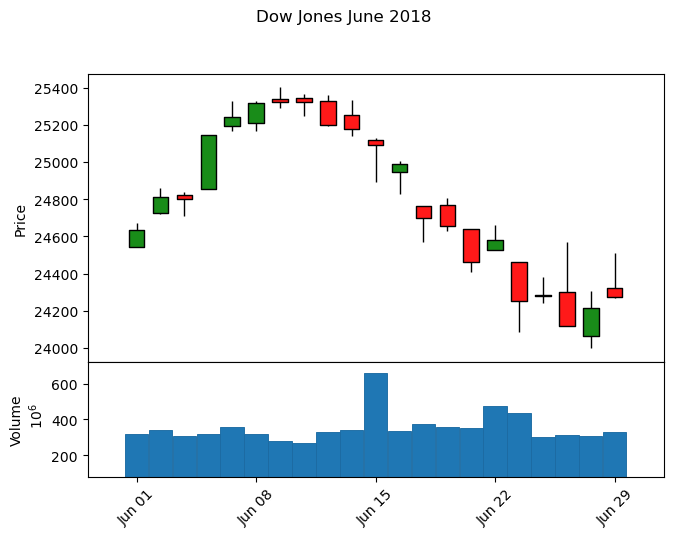

<Figure size 640x480 with 0 Axes>

In [33]:
#Dow Jones price and volume june 2018
dow_june18 =data.DataReader("^DJI", "yahoo", "2018-06-01","2018-06-30")

#plot
dow_june18_plot = mpf.plot(dow_june18, type='candle', title='Dow Jones June 2018',ylabel='Price', ylabel_lower='Volume',volume=True, style = market_style)

#save plot
plt.savefig("output/dow_june2018.jpg")

#Display
dow_june18_plot

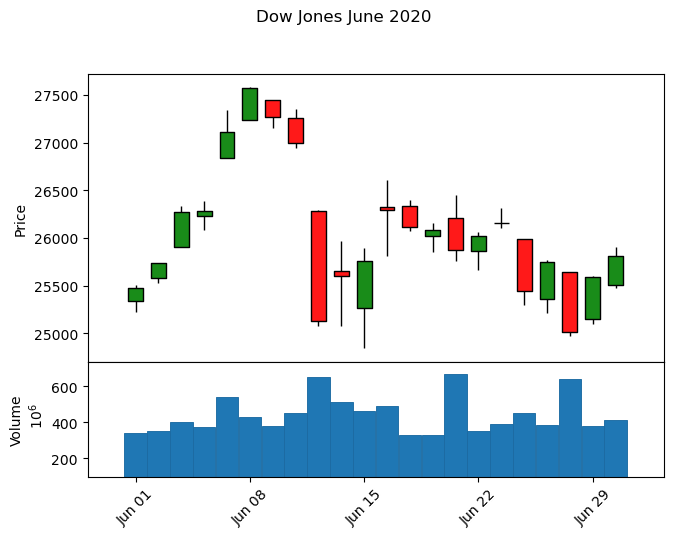

<Figure size 640x480 with 0 Axes>

In [34]:
#Dow Jones price and volume june 2020
dow_june20 =data.DataReader("^DJI", "yahoo", "2020-06-01","2020-06-30")

#plot
dow_june20_plot = mpf.plot(dow_june20, type='candle', title='Dow Jones June 2020',ylabel='Price', ylabel_lower='Volume',volume=True, style = market_style)

#save plot
plt.savefig("output/dow_june2020.jpg")

#Display
dow_june20_plot

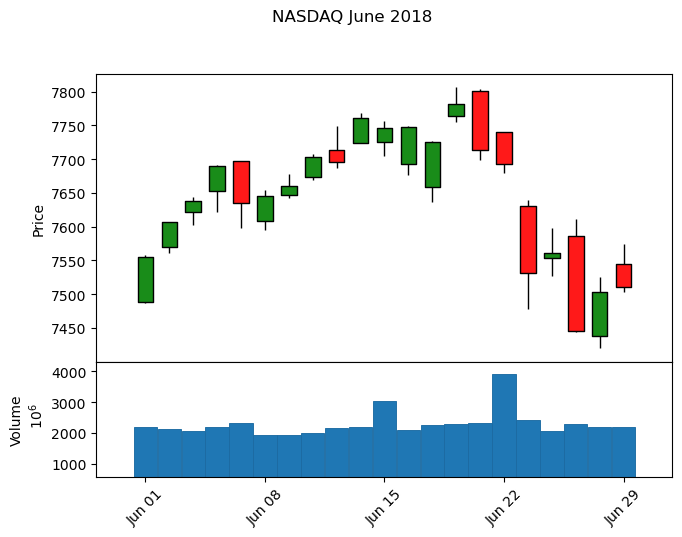

<Figure size 640x480 with 0 Axes>

In [35]:
#NASDAQ price and volume june 2018
nasdaq_june18 =data.DataReader("^IXIC", "yahoo", "2018-06-01","2018-06-30")

#plot
nasdaq_june18_plot = mpf.plot(nasdaq_june18, type='candle', title='NASDAQ June 2018',ylabel='Price', ylabel_lower='Volume',volume=True, style = market_style)

#save plot
plt.savefig("output/nasdaq_june2018.jpg")

#Display
nasdaq_june18_plot

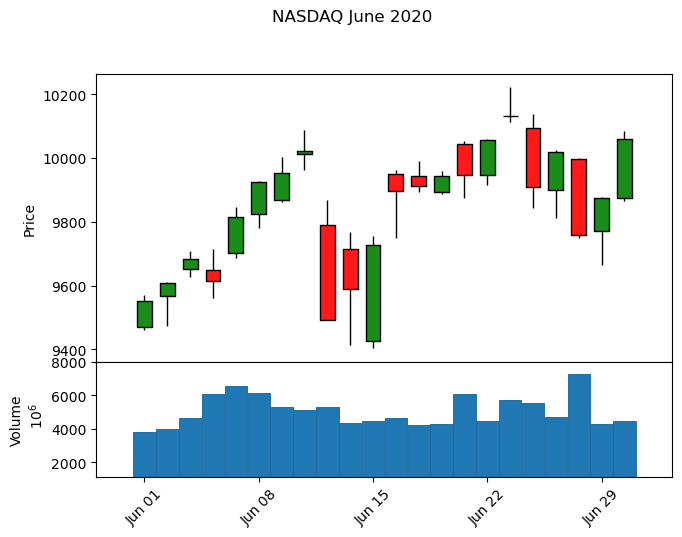

<Figure size 640x480 with 0 Axes>

In [36]:
#NASDAQ price and volume june 2020
nasdaq_june20 =data.DataReader("^IXIC", "yahoo", "2020-06-01","2020-06-30")

#plot
nasdaq_june20_plot = mpf.plot(nasdaq_june20, type='candle', title='NASDAQ June 2020',ylabel='Price', ylabel_lower='Volume',volume=True, style = market_style)

#save plot
plt.savefig("output/nasdaq_june2020.jpg")

#Display
#nasdaq_june20_plot

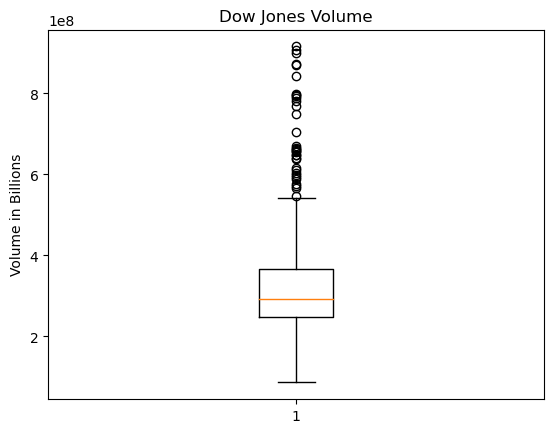

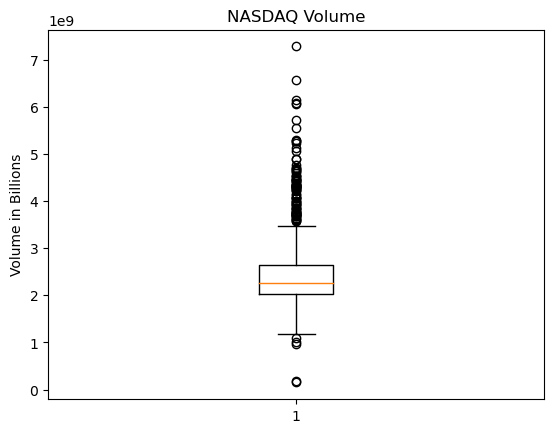

<Figure size 640x480 with 0 Axes>

In [37]:
dow_box = stock_indexes_list_volume['Dow Jones Volume']

fig1, ax1 = plt.subplots()
ax1.set_title('Dow Jones Volume')
ax1.set_ylabel('Volume in Billions')
ax1.boxplot(dow_box)

nasdaq_box = stock_indexes_list_volume['NASDAQ Volume']

fig2, ax1 = plt.subplots()
ax1.set_title('NASDAQ Volume')
ax1.set_ylabel('Volume in Billions')
ax1.boxplot(nasdaq_box)

#display plot
plt.show()
plt.tight_layout()